# Ina section performance

This notebook creates confusion matrixes to compare the perfomance of a model in all the sections of the ina dataset

### Imports

In [2]:
import os
import sys
import itertools

import numpy as np
import pandas as pd
from collections import defaultdict

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

2025-05-03 17:05:00.264000: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-03 17:05:00.270347: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746302700.277697  619446 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746302700.280008  619446 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746302700.285764  619446 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

### Definitions

In [3]:
sys.path.insert(0, "../../")
from config import CROPPED_PATH, MODELS_PATH

# Paths
TEST_PATH = os.path.join(CROPPED_PATH, 'ina', 'labeled_images', 'test')
MODEL_PATH= os.path.join(MODELS_PATH, 'supervised', 'supervised_Encoder_SSIM+MAE4.keras')

results = []

### Functions

In [4]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 14)

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

def plot_conf_matrix(model, generator, titulo='Confusion matrix'):
    ### RETRIVE TEST LABEL FROM GENERATOR ###
    test_num = sum(1 for _ in generator)
    label_test = []
    pred_test = []
    for i, batch in enumerate(generator):
        X, y = batch
        label_test.append(y)
        predictions = model.predict(X,verbose=0)
        pred_test.append(predictions)

    label_test = np.argmax(np.vstack(label_test), axis=1)


    ### COMPUTE PREDICTIONS ON TEST DATA ###
    pred_test = np.argmax(np.vstack(pred_test), axis=1)
    accuracy=accuracy_score(label_test, pred_test)
    recall=recall_score(label_test, pred_test,pos_label=0)
    specificity=recall_score(label_test, pred_test,pos_label=1)
    precision = precision_score(label_test, pred_test, pos_label=0)
    # pred_test = pred_test[:label_test.shape[0],]
    ### ACCURACY ON TEST DATA ###
    print("-" * 40)
    print('ACCURACY:', accuracy)
    print('RECALL:',recall)
    print('PRECISION:', precision)
    print('SPECIFICITY:',specificity)
    print("-" * 40)
    print("\n")
    ### CONFUSION MATRIX ON TEST DATA ###
    cnf_matrix = confusion_matrix(label_test, pred_test)
    results.append({'Model': titulo, 'Accuracy': accuracy , 'Recall':recall,'Precision':precision,'Specificity':specificity})

    plt.figure(figsize=(7,7))
    plot_confusion_matrix(cnf_matrix, classes=['cell', 'not'], title=titulo)
    plt.title(titulo)
    plt.show()

### Get predictions per section

I0000 00:00:1746302702.194916  619446 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1070 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1746302702.664079  715314 service.cc:152] XLA service 0x710df0017af0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746302702.664089  715314 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-05-03 17:05:02.668950: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746302702.710440  715314 cuda_dnn.cc:529] Loaded cuDNN version 90701
I0000 00:00:1746302702.979679  715314 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


----------------------------------------
ACCURACY: 0.9613152804642167
RECALL: 0.959409594095941
PRECISION: 0.966542750929368
SPECIFICITY: 0.9634146341463414
----------------------------------------




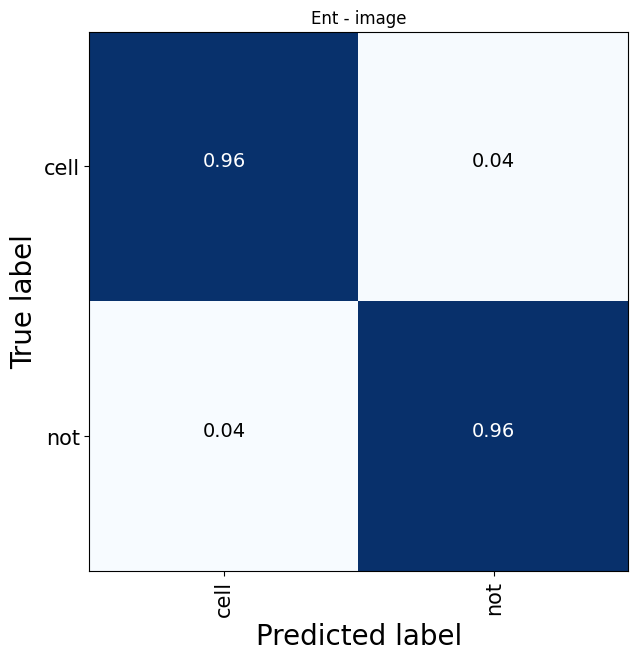

----------------------------------------
ACCURACY: 0.9626865671641791
RECALL: 0.9681528662420382
PRECISION: 0.9681528662420382
SPECIFICITY: 0.954954954954955
----------------------------------------




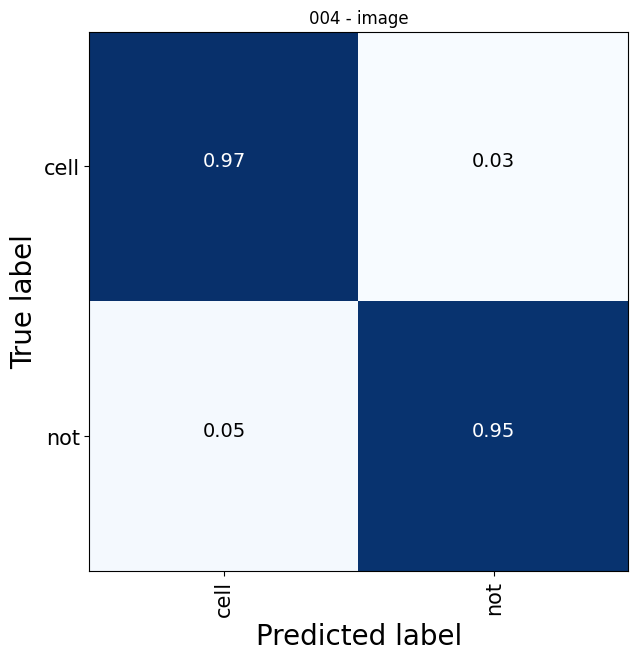

----------------------------------------
ACCURACY: 0.8888888888888888
RECALL: 0.9054054054054054
PRECISION: 0.8072289156626506
SPECIFICITY: 0.8796992481203008
----------------------------------------




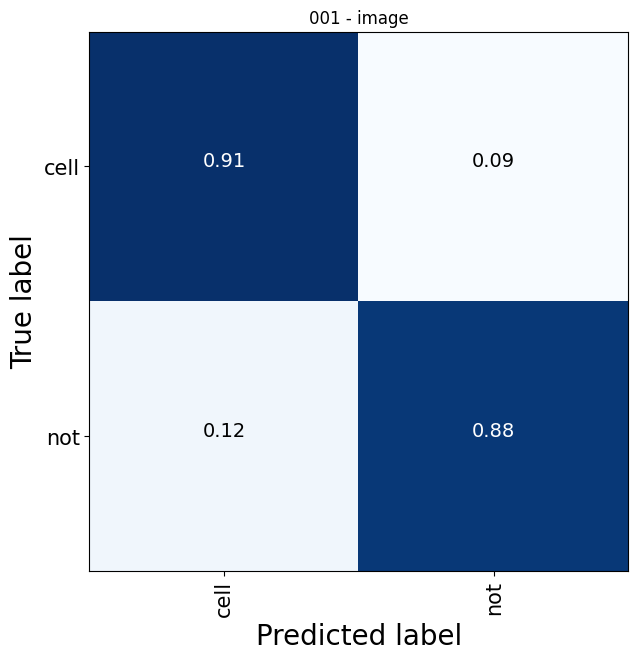

----------------------------------------
ACCURACY: 0.8122743682310469
RECALL: 0.9375
PRECISION: 0.375
SPECIFICITY: 0.7959183673469388
----------------------------------------




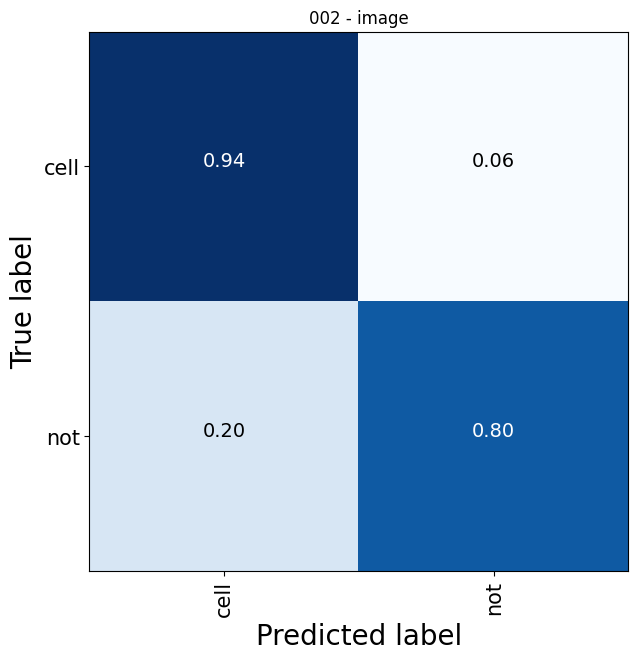

----------------------------------------
ACCURACY: 0.9300699300699301
RECALL: 0.92
PRECISION: 0.9787234042553191
SPECIFICITY: 0.9534883720930233
----------------------------------------




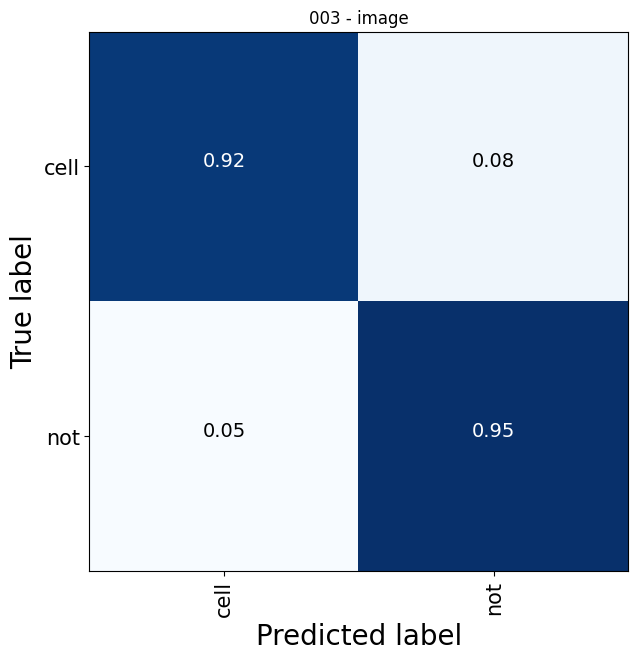

----------------------------------------
ACCURACY: 0.9807692307692307
RECALL: 0.9807692307692307
PRECISION: 1.0
SPECIFICITY: 0.0
----------------------------------------




/home/nicolas/Documentos/UTN/INA/giar_ina_dev/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/tmp/ipykernel_619446/3343774519.py:3: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


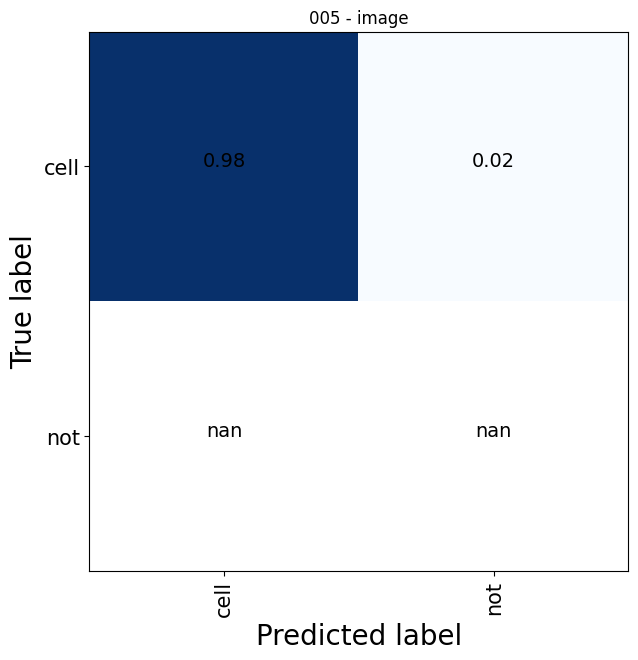

In [5]:
types_images=['cells', 'not']
images_groups = defaultdict(list)

for i in types_images:
  path_tmp=os.path.join(TEST_PATH,i)
  images=os.listdir(path_tmp)
  if i=='special_cells' or i=='cells' :
    y=[1,0]
  else:
    y=[0,1]

  for img in images:
      prefix = img[:3]
      path_image=os.path.join(path_tmp,img)
      img = image.load_img(path_image, color_mode='grayscale', target_size=(128, 128))
      img=np.array(img) / 255.0
      img = np.expand_dims(img, axis=-1)
      img = np.expand_dims(img, axis=0)
      images_groups[prefix].append([img,y])


images_groups  = dict(images_groups )

model = load_model(MODEL_PATH)
for name,imgs in images_groups.items():
  plot_conf_matrix(model, imgs, name + ' - image')

In [6]:
results_df = pd.DataFrame(results)

print(results_df)


         Model  Accuracy    Recall  Precision  Specificity
0  Ent - image  0.961315  0.959410   0.966543     0.963415
1  004 - image  0.962687  0.968153   0.968153     0.954955
2  001 - image  0.888889  0.905405   0.807229     0.879699
3  002 - image  0.812274  0.937500   0.375000     0.795918
4  003 - image  0.930070  0.920000   0.978723     0.953488
5  005 - image  0.980769  0.980769   1.000000     0.000000


### Get predictions on special cells

In [7]:
types_images=['special_cells']
images_groups=[]

for i in types_images:
  path_tmp=os.path.join(CROPPED_PATH, 'ina', 'labeled_images', i)
  images=os.listdir(path_tmp)
  if i=='special_cells' or i=='cells' :
    y=[1,0]
  else:
    y=[0,1]

  for img in images:
      path_image=os.path.join(path_tmp,img)
      img = image.load_img(path_image, color_mode='grayscale', target_size=(128, 128))
      img=np.array(img) / 255.0
      img = np.expand_dims(img, axis=-1)
      img = np.expand_dims(img, axis=0)
      images_groups.append([img,y])

model = load_model(MODEL_PATH)
label_test = []
pred_test = []
for i, batch in enumerate(images_groups):
    X, y = batch
    label_test.append(y)
    predictions = model.predict(X,verbose=0)
    pred_test.append(predictions)
label_test = np.argmax(np.vstack(label_test), axis=1)
### COMPUTE PREDICTIONS ON TEST DATA ###
pred_test = np.argmax(np.vstack(pred_test), axis=1)
accuracy=accuracy_score(label_test, pred_test)
### ACCURACY ON TEST DATA ###
print("-" * 40)
print("Total special images: ", len(images_groups))
print('ACCURACY:', accuracy)
print("-" * 40)

----------------------------------------
Total special images:  28
ACCURACY: 0.9285714285714286
----------------------------------------
